In [165]:
from src_2020.Parser import parse
import sys

def load_solution(input_file, solution_file):
    _, _, nb_days, scores, libs, books = parse(input_file)
    all_books = set()
    libraries_used = set()
    day = 0
    all_lines = open(solution_file).read().split('\n')
    est_nb_libs = len(all_lines)-1 // 2
    lib_order = []
    for i, line in enumerate(all_lines):
        if len(line.strip()) == 0: break
        if i == 0:
            nb_libraries = int(line)
            continue
        if i%2 == 1:
            library_id, nb_books = map(int,line.strip().split())

            # safety check
            if library_id in libraries_used:
                print("warning! library %d used twice" % library_id)
            libraries_used.add(library_id)
        else:
            lib_books = list(map(int,line.strip().split()))
            
        
            # set the solution
            libs[library_id].signup_on = day
            libs[library_id].books_to_scan = lib_books
            lib_order += [(library_id, day)]
            
            day += libs[library_id].signup
            #print("library",library_id,"nb_books",nb_books)
            #print("books:",lib_books)
            all_books |= set(lib_books)
            remaining_days = nb_days - day
            if len(lib_books) > remaining_days * libs[library_id].ship:
                print("warning! library",library_id,"(number %d/%d in solution)" % (i//2,est_nb_libs),"with capacity",libs[library_id].ship,"outputs more books than it has time for (%d > %d)" % (len(lib_books), remaining_days * libs[library_id].ship))

    print(len(all_books),"books total were selected, ",remaining_days,"unused signup day(s)")
    return libs, lib_order, nb_days

In [166]:
libs, lib_order, nb_days = load_solution("a_example.txt","../res_2020/a_sol.txt")
#libs, lib_order, nb_days = load_solution("b_read_on.txt","../res_2020/b_sol.txt")
#libs, lib_order, nb_days = load_solution("c_incunabula.txt","../res_2020/c_sol.txt")
#libs, lib_order, nb_days = load_solution("d_tough_choices.txt","../res_2020/d_sol.txt")
#libs, lib_order, nb_days = load_solution("e_so_many_books.txt","../res_2020/e_sol.txt")
#libs, lib_order, nb_days = load_solution("f_libraries_of_the_world.txt","../res_2020/f_sol.txt")

6 books total were selected,  2 unused signup day(s)


In [167]:
%matplotlib inline
import seaborn as sns
import pandas as pd

#libs = libs[:100]

df = pd.DataFrame()
df['id'] = [lib.ide for lib in libs]
df['signup_on'] = [lib.signup_on for lib in libs]
df['signup'] = [lib.signup for lib in libs]
df['nb_books'] = [len(lib.books) for lib in libs]
lib_signedup_rank=dict([(library_id,i) for (i,(library_id,day)) in enumerate(lib_order)])
df['signup_rank'] = [lib_signedup_rank[i] if i in lib_signedup_rank else -1 for i in range(len(libs))]
df.set_index('id',drop=True)
df = df.sort_values(['signup_on']) # sort by signup-on time
df = df[df['signup_on'] != -1] # select only selected libs


lib 0 is only scanned until 6.0
lib 1 is only scanned until 7.0


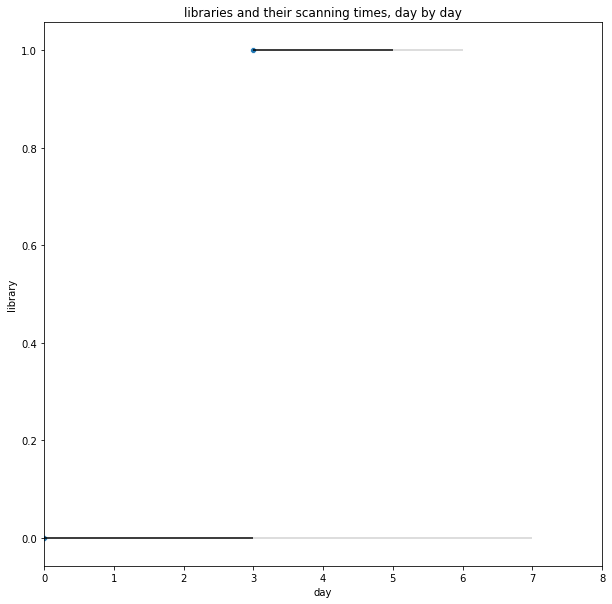

In [169]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="signup_on", y="signup_rank", data=df)
ax.set(xlabel='day', ylabel='library',xlim=(0,nb_days+1))
ax.set_title("libraries and their scanning times, day by day")

from matplotlib import collections  as mc

# draw signup times
lines = [[(lib.signup_on, lib_signedup_rank[lib.ide]), (lib.signup_on + lib.signup, lib_signedup_rank[lib.ide])] for lib in libs if lib.ide in lib_signedup_rank]
lc = mc.LineCollection(lines, colors='black', linewidths=1.5)    
ax.add_collection(lc)
# and more importantly, draw the time it takes to scan the books
lines = [[(lib.signup_on+ lib.signup, lib_signedup_rank[lib.ide]), (lib.signup_on + lib.signup + len(lib.books_to_scan)/lib.ship, lib_signedup_rank[lib.ide])] for lib in libs if lib.ide in lib_signedup_rank]
lc = mc.LineCollection(lines, colors='lightgray', linewidths=1.5)    
ax.add_collection(lc)
#print(sorted(lines))

# sanity check, if any lib is not scanned until the end, report it here
for lib in libs:
    if lib.signup_on != -1:
        if (lib.signup_on + lib.signup + len(lib.books_to_scan)/lib.ship) != 200:
            print("lib",lib.ide,"is only scanned until",lib.signup_on + lib.signup + len(lib.books_to_scan)/lib.ship)
None